In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

This project evaluates multiple machine learning classification models to predict credit card default in the next month using customer demographic and financial behavior data. The models are compared using classification metrics to analyze their effectiveness on an imbalanced dataset and to understand the challenges involved in default prediction.

In [ ]:
df=pd.read_excel('/content/default of credit card clients.xls')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df.columns=df.iloc[0]
df=df.iloc[1:]
df.reset_index(drop=True,inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.isna().sum()

,0
0,
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [ ]:
df.columns.dtype

dtype('O')

In [ ]:
#convert all columns to int
df=df.astype(int)
#df.info()

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.skew()

,0
0,
ID,0.000000
LIMIT_BAL,0.992867
SEX,-0.424183
EDUCATION,0.970972
MARRIAGE,-0.018742
AGE,0.732246
PAY_0,0.731975
PAY_2,0.790565
PAY_3,0.840682


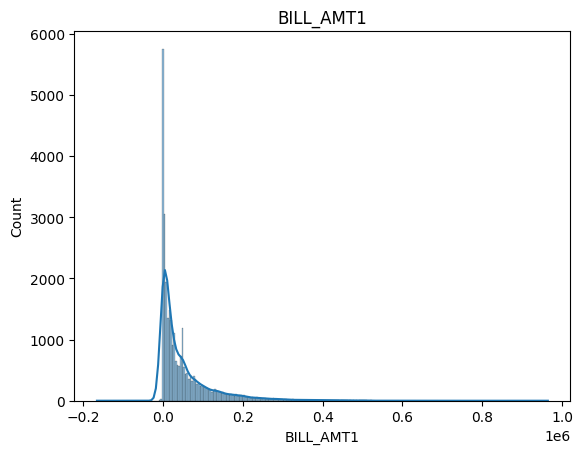

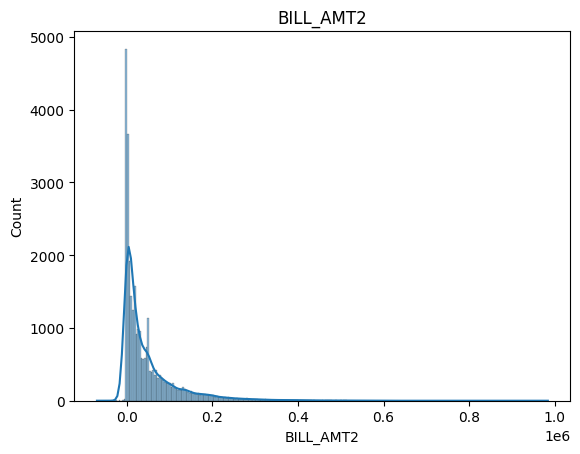

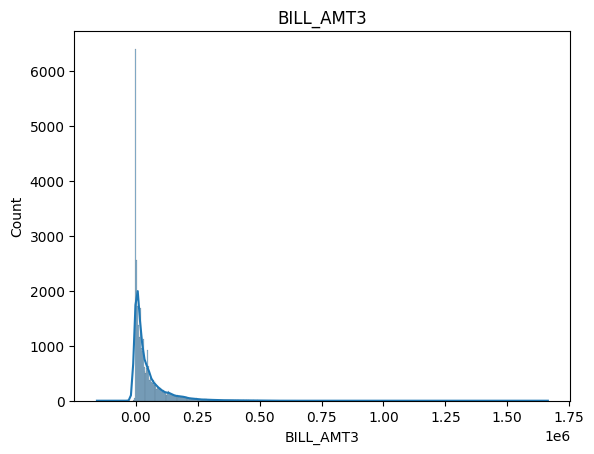

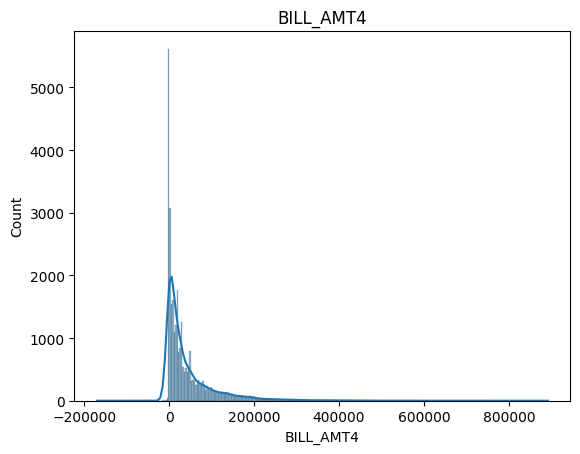

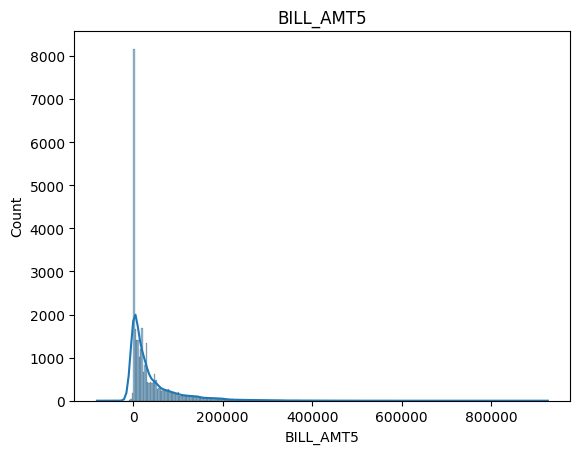

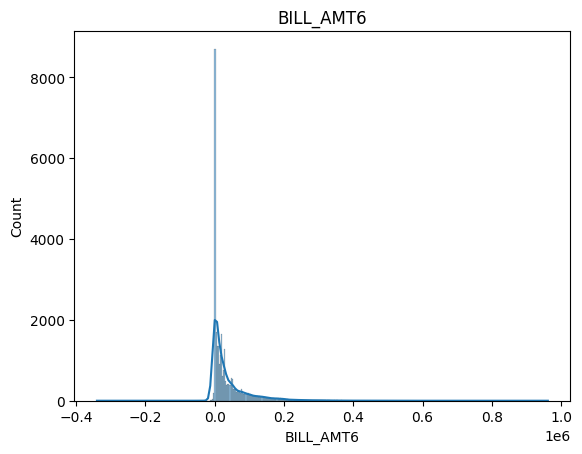

In [ ]:
lst=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
for i in lst:
  plot=sns.histplot(df[i],kde=True)
  plt.title(f'{i}')
  plt.show()

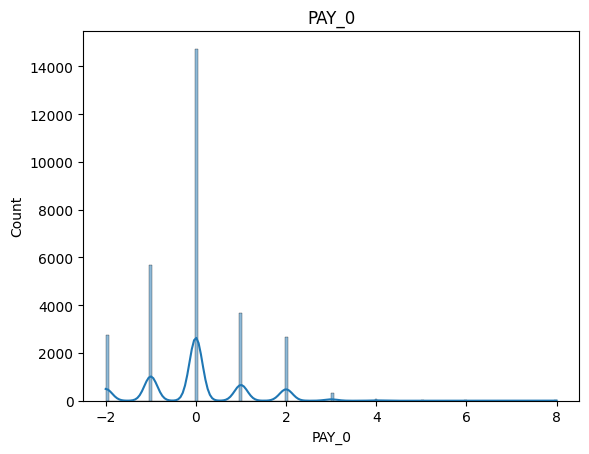

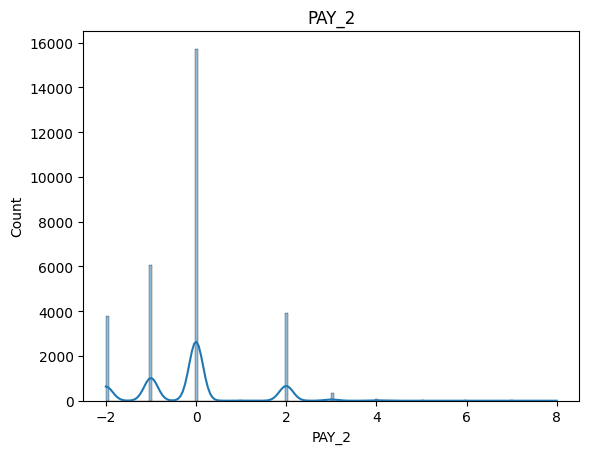

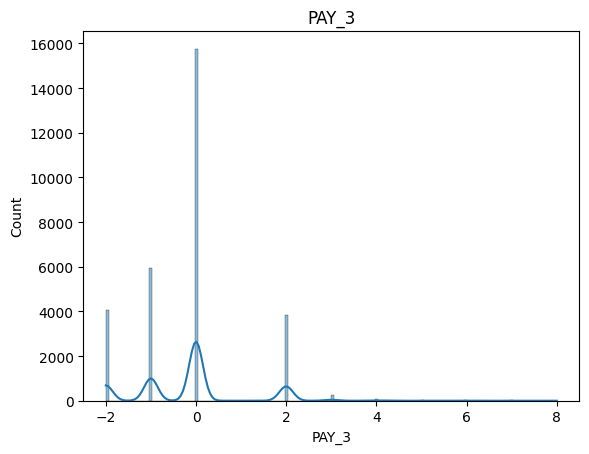

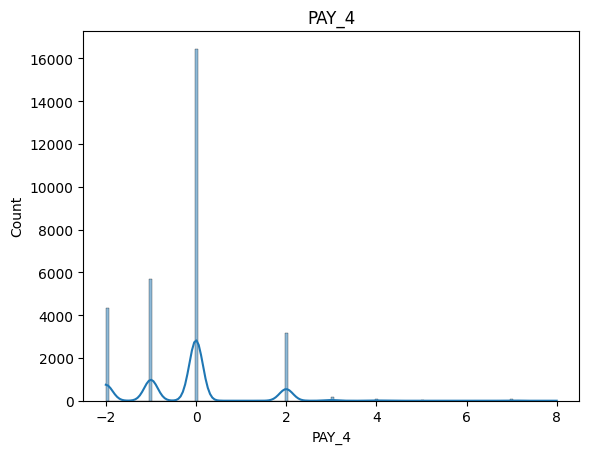

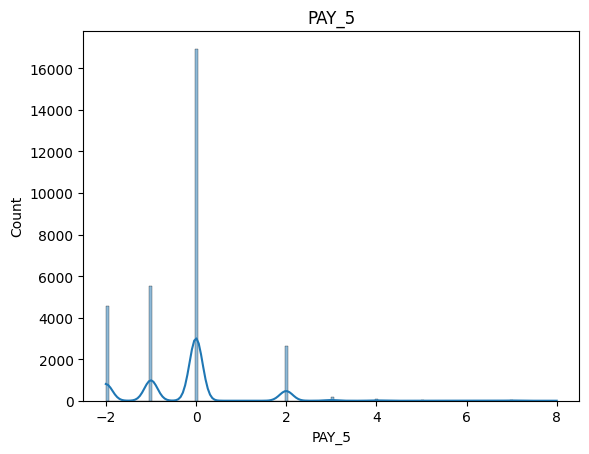

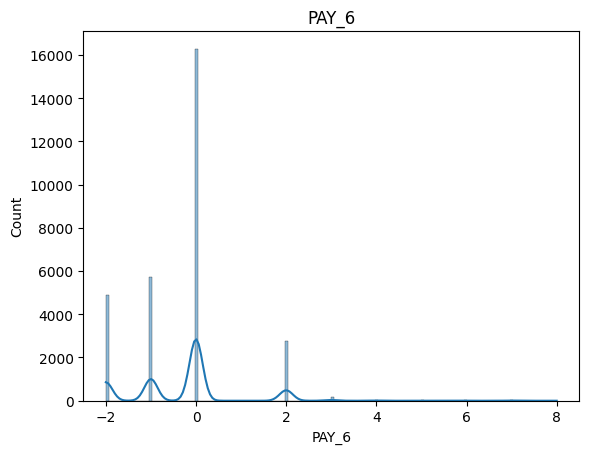

In [ ]:
lst2=df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
for i in lst2:
  plot=sns.histplot(df[i],kde=True)
  plt.title(f'{i}')
  plt.show()

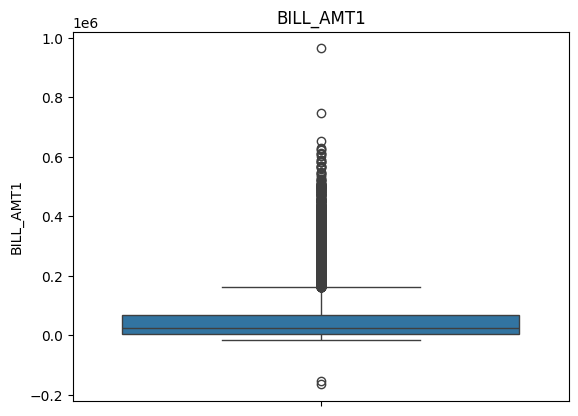

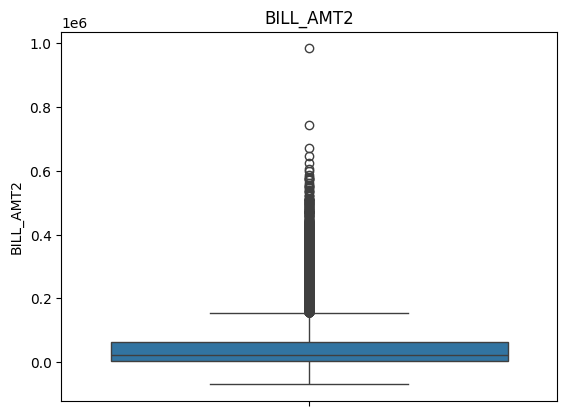

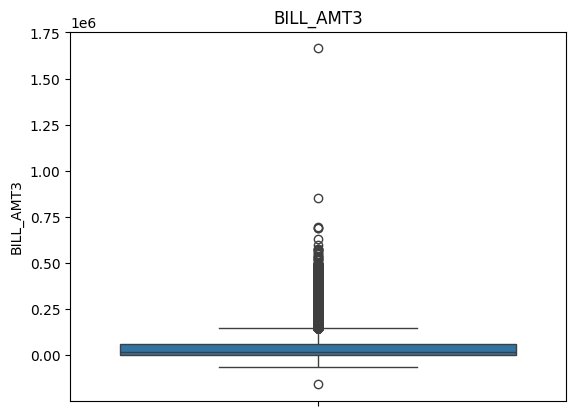

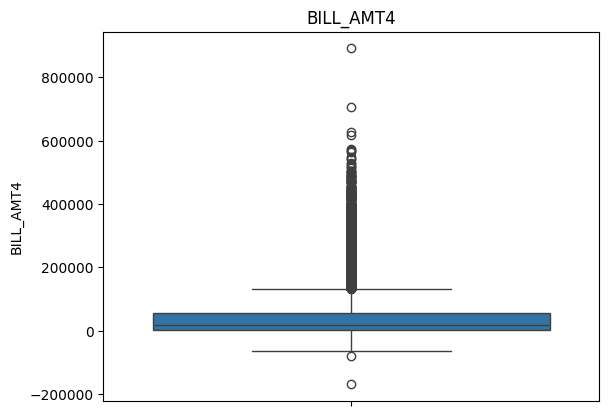

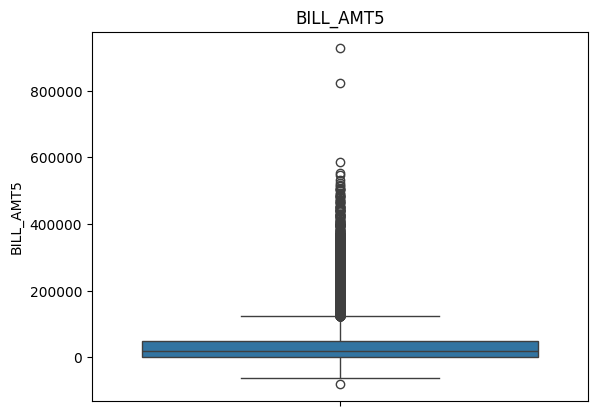

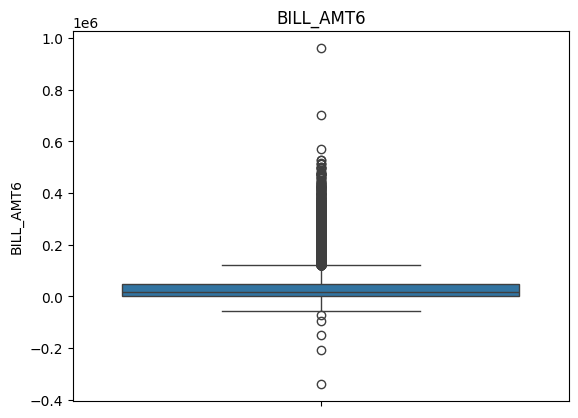

In [ ]:
lst=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
for i in lst:
  plot=sns.boxplot(df[i])
  plt.title(f'{i}')
  plt.show()

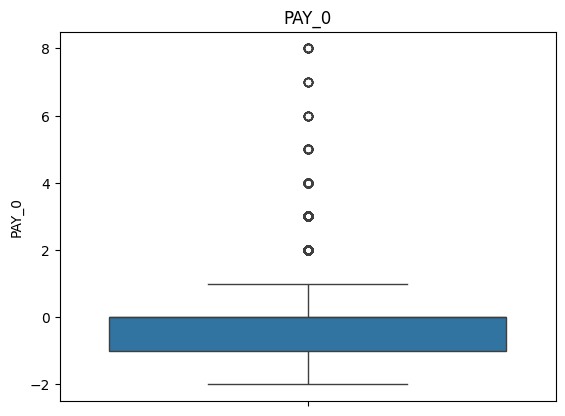

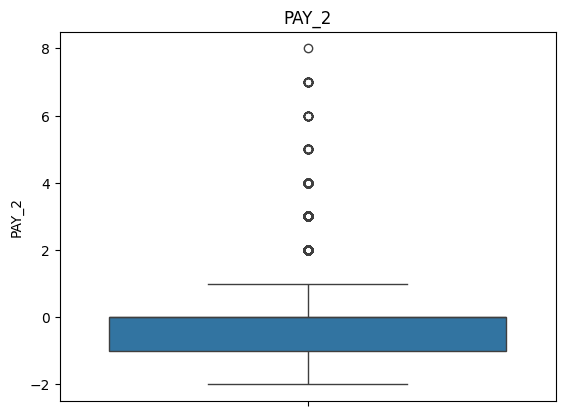

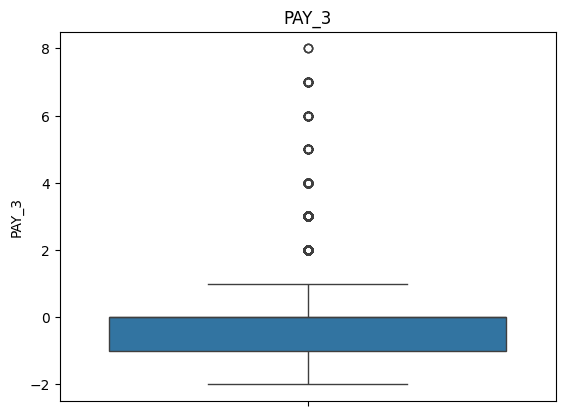

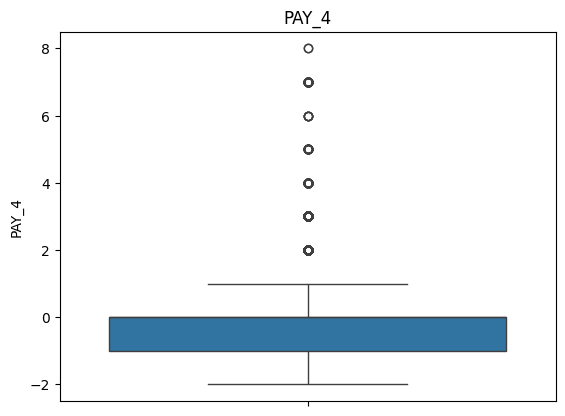

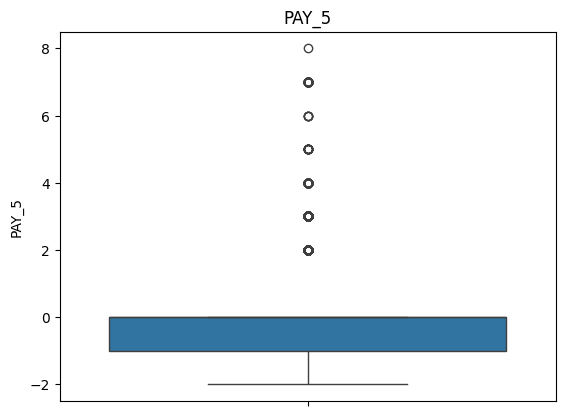

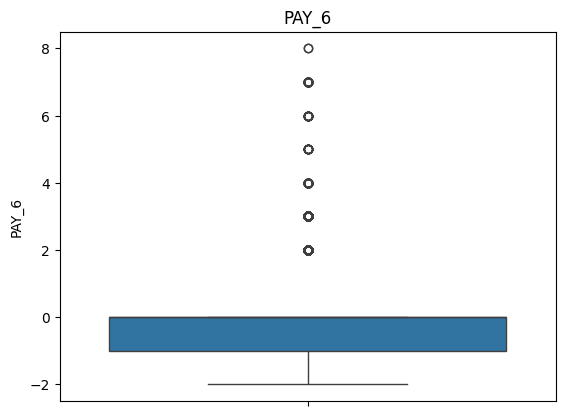

In [ ]:
lst2=df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
for i in lst2:
  plot=sns.boxplot(df[i])
  plt.title(f'{i}')
  plt.show()

This project evaluates multiple machine learning classification models to predict credit card default in the next month using customer demographic and financial behavior data. The models are compared using classification metrics to analyze their effectiveness on an imbalanced dataset and to understand the challenges involved in default prediction.

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
q1,q2,q3=np.percentile(df['LIMIT_BAL'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['LIMIT_BAL']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['LIMIT_BAL']=np.where(df['LIMIT_BAL']>upper_bound,upper_bound,df['LIMIT_BAL'])
df['LIMIT_BAL']=np.where(df['LIMIT_BAL']<lower_bound,lower_bound,df['LIMIT_BAL'])


-235000.0 525000.0
[630000, 580000, 600000, 620000, 630000, 610000, 700000, 670000, 680000, 630000, 550000, 540000, 580000, 580000, 1000000, 600000, 550000, 580000, 550000, 530000, 600000, 550000, 710000, 560000, 550000, 710000, 750000, 710000, 580000, 750000, 680000, 640000, 580000, 550000, 530000, 640000, 710000, 670000, 610000, 530000, 570000, 560000, 640000, 610000, 590000, 640000, 700000, 580000, 530000, 550000, 640000, 700000, 570000, 660000, 560000, 600000, 620000, 630000, 750000, 720000, 630000, 620000, 600000, 610000, 610000, 620000, 550000, 560000, 530000, 660000, 750000, 610000, 740000, 600000, 550000, 700000, 800000, 590000, 600000, 540000, 600000, 550000, 570000, 570000, 550000, 550000, 630000, 560000, 570000, 800000, 590000, 680000, 580000, 560000, 540000, 600000, 560000, 700000, 540000, 550000, 560000, 530000, 710000, 640000, 550000, 660000, 700000, 760000, 680000, 570000, 560000, 590000, 600000, 620000, 620000, 570000, 610000, 710000, 690000, 540000, 550000, 600000, 650

In [ ]:
q1,q2,q3=np.percentile(df['PAY_0'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['PAY_0']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['PAY_0']=np.where(df['PAY_0']>upper_bound,upper_bound,df['PAY_0'])
df['PAY_0']=np.where(df['PAY_0']<lower_bound,lower_bound,df['PAY_0'])


-2.5 1.5
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 4, 2, 8, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 8, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
q1,q2,q3=np.percentile(df['PAY_2'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['PAY_2']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['PAY_2']=np.where(df['PAY_2']>upper_bound,upper_bound,df['PAY_2'])
df['PAY_2']=np.where(df['PAY_2']<lower_bound,lower_bound,df['PAY_2'])


-2.5 1.5
[2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 7, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 6, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
q1,q2,q3=np.percentile(df['PAY_3'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['PAY_3']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['PAY_3']=np.where(df['PAY_3']>upper_bound,upper_bound,df['PAY_3'])
df['PAY_3']=np.where(df['PAY_3']<lower_bound,lower_bound,df['PAY_3'])


-2.5 1.5
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 4, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 4, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 6, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 7, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 2, 

In [ ]:
q1,q2,q3=np.percentile(df['PAY_4'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['PAY_4']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['PAY_4']=np.where(df['PAY_4']>upper_bound,upper_bound,df['PAY_4'])
df['PAY_4']=np.where(df['PAY_4']<lower_bound,lower_bound,df['PAY_4'])

-2.5 1.5
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 7, 2, 2, 3, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 3, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 4, 2, 2, 7, 2, 2, 2, 2, 2, 7, 2, 3, 2, 2, 3, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 7, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 

In [ ]:
q1,q2,q3=np.percentile(df['PAY_5'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['PAY_5']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['PAY_5']=np.where(df['PAY_5']>upper_bound,upper_bound,df['PAY_5'])
df['PAY_5']=np.where(df['PAY_5']<lower_bound,lower_bound,df['PAY_5'])

-2.5 1.5
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 7, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 7, 2, 2, 2, 4, 7, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 7, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 7, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
q1,q2,q3=np.percentile(df['PAY_6'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['PAY_6']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['PAY_6']=np.where(df['PAY_6']>upper_bound,upper_bound,df['PAY_6'])
df['PAY_6']=np.where(df['PAY_6']<lower_bound,lower_bound,df['PAY_6'])

-2.5 1.5
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 6, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 6, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 7, 2, 2, 2, 2, 3, 7, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 6, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 

In [ ]:
q1,q2,q3=np.percentile(df['BILL_AMT1'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['BILL_AMT1']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['BILL_AMT1']=np.where(df['BILL_AMT1']>upper_bound,upper_bound,df['BILL_AMT1'])
df['BILL_AMT1']=np.where(df['BILL_AMT1']<lower_bound,lower_bound,df['BILL_AMT1'])

-91739.625 162389.375
[367965, 253286, 186503, 218668, 175886, 400134, 165254, 422069, 171438, 304991, 163736, 253454, 227389, 197236, 208775, 196031, 199436, 226430, 296573, 335196, 291619, 234205, 210380, 163935, 195126, 180641, 194353, 172180, 274731, 194314, 507726, 173267, 338106, 507062, 168382, 169661, 192586, 212601, 304867, 234752, 246135, 467150, 255691, 208459, 212795, 355215, 366193, 177554, 203183, 221590, 330759, 279610, 268112, 276436, 214450, 186149, 247276, 162671, 280823, 240878, 213738, 315201, 205064, 310403, 224020, 168286, 386405, 471814, 219099, 190258, 294827, 286732, 279846, 166246, 164736, 284204, 204198, 172041, 354506, 215316, 198510, 244663, 176502, 234328, 256402, 191493, 386301, 194241, 410033, 169263, 247279, 209807, 211749, 164634, 351828, 270276, 225400, 194301, 385662, 194961, 165303, 179851, 172184, 440474, 495559, 244738, 192461, 356913, 165040, 189567, 187610, 167474, 360023, 482250, 184676, 178367, 232523, 171141, 337981, 270248, 240248, 177956, 2

In [ ]:
q1,q2,q3=np.percentile(df['BILL_AMT2'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['BILL_AMT2']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['BILL_AMT2']=np.where(df['BILL_AMT2']>upper_bound,upper_bound,df['BILL_AMT2'])
df['BILL_AMT2']=np.where(df['BILL_AMT2']<lower_bound,lower_bound,df['BILL_AMT2'])

-88547.5 155538.5
[412023, 246536, 181328, 221296, 173440, 398857, 157784, 431342, 178382, 311243, 247743, 228719, 176192, 182350, 196143, 156858, 202947, 231878, 303320, 334954, 297268, 231669, 213522, 181557, 197344, 180140, 160246, 281713, 179206, 509229, 174590, 342904, 163916, 491956, 175646, 167199, 197967, 177946, 299998, 162189, 233036, 231443, 458862, 262736, 206331, 211043, 363325, 372700, 180633, 202961, 227397, 156839, 337794, 282024, 263368, 239025, 181779, 156765, 241167, 166202, 156955, 156104, 275303, 233838, 228963, 199602, 332071, 315048, 227311, 199563, 155893, 387910, 478380, 217058, 181207, 292920, 290690, 169426, 169163, 170564, 170592, 284041, 239499, 201648, 363666, 198490, 194040, 243209, 176297, 234211, 264267, 187913, 392458, 193425, 385394, 174532, 235093, 205947, 166134, 280067, 506260, 220202, 199451, 294826, 197536, 168837, 186961, 170697, 444370, 248821, 251351, 195970, 208305, 167485, 189023, 191592, 155693, 157364, 363239, 475931, 178491, 179062, 24375

In [ ]:
q1,q2,q3=np.percentile(df['BILL_AMT3'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['BILL_AMT3']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['BILL_AMT3']=np.where(df['BILL_AMT3']>upper_bound,upper_bound,df['BILL_AMT3'])
df['BILL_AMT3']=np.where(df['BILL_AMT3']<lower_bound,lower_bound,df['BILL_AMT3'])

-83581.5 146412.5
[445007, 194663, 180422, 206895, 172308, 404205, 162702, 479432, 306314, 229049, 229644, 189524, 151841, 193936, 234192, 307843, 335527, 205629, 214642, 201852, 147032, 149944, 186292, 147042, 166281, 151905, 159988, 242063, 193992, 499936, 175233, 344464, 156523, 159676, 430637, 180650, 199960, 158520, 201666, 300426, 166127, 229286, 234557, 469703, 159019, 203813, 212759, 373181, 375948, 172914, 222102, 194449, 230302, 285138, 160440, 274075, 282508, 259969, 151310, 149128, 150000, 192189, 159386, 147936, 238196, 177639, 161973, 158279, 271952, 238067, 223810, 375070, 150320, 314085, 184500, 293177, 395612, 187841, 291760, 284059, 150666, 173969, 283396, 203867, 197549, 369776, 169014, 199393, 229265, 162826, 157345, 271951, 169223, 290201, 196537, 325663, 176686, 146682, 224062, 201848, 259651, 263734, 215056, 198684, 220022, 203251, 172281, 201703, 168041, 455286, 216051, 244949, 152786, 148133, 187521, 195739, 155290, 156581, 350214, 429037, 169860, 177663, 25314

In [ ]:
q1,q2,q3=np.percentile(df['BILL_AMT4'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['BILL_AMT4']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['BILL_AMT4']=np.where(df['BILL_AMT4']>upper_bound,upper_bound,df['BILL_AMT4'])
df['BILL_AMT4']=np.where(df['BILL_AMT4']<lower_bound,lower_bound,df['BILL_AMT4'])

-75942.125 132774.875
[542653, 170410, 628699, 168608, 360199, 144098, 487066, 144401, 258610, 220951, 227587, 135668, 167163, 137277, 152803, 196186, 190211, 479978, 333860, 215827, 142323, 207642, 169115, 133345, 148190, 155628, 153538, 158114, 139679, 174675, 505507, 240865, 159653, 142590, 166893, 376657, 182672, 156977, 205798, 292869, 169365, 217644, 200643, 447130, 201331, 218541, 252195, 195991, 144035, 196814, 186635, 249445, 163781, 252584, 284660, 135253, 255832, 141937, 195517, 161870, 149573, 231580, 174397, 167201, 161934, 193403, 242579, 158542, 354839, 147989, 317631, 138604, 274539, 386295, 186140, 288024, 153833, 294308, 136607, 133465, 137274, 183030, 213294, 188064, 151858, 192093, 368779, 167776, 194538, 228114, 160186, 155335, 278509, 135320, 144470, 153063, 295606, 195268, 324067, 165491, 150407, 212480, 168664, 243094, 268216, 154283, 208355, 137540, 175705, 189455, 163783, 327021, 208373, 248273, 168014, 137946, 182671, 198081, 147604, 150637, 159231, 319960, 3

In [ ]:
q1,q2,q3=np.percentile(df['BILL_AMT5'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['BILL_AMT5']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['BILL_AMT5']=np.where(df['BILL_AMT5']>upper_bound,upper_bound,df['BILL_AMT5'])
df['BILL_AMT5']=np.where(df['BILL_AMT5']<lower_bound,lower_bound,df['BILL_AMT5'])

-70878.25 122831.75
[483003, 173901, 195969, 132202, 356656, 180000, 147124, 471145, 152174, 246491, 210606, 227775, 132233, 177145, 146975, 145533, 155997, 200162, 173557, 305145, 335760, 208464, 127280, 140120, 210375, 172169, 133634, 147993, 130331, 145645, 156664, 158762, 141748, 171253, 484612, 234939, 162866, 142650, 170098, 356636, 168399, 157963, 196698, 292885, 168755, 223690, 194410, 440982, 127402, 126075, 198999, 167743, 257496, 152127, 140419, 200526, 189896, 222831, 167159, 216547, 255892, 134629, 245462, 123528, 144990, 199250, 165725, 152574, 229683, 161327, 133467, 165447, 187562, 238245, 162244, 369532, 143355, 128683, 315820, 130883, 136283, 253443, 356206, 191678, 274632, 151194, 297916, 133199, 133536, 147314, 181385, 213384, 147915, 187726, 369358, 168110, 195990, 232795, 161965, 153427, 283545, 138523, 144386, 133490, 300709, 192829, 324749, 169222, 147868, 202148, 172013, 223907, 262895, 213015, 144786, 161110, 179582, 194373, 160806, 334558, 199727, 126154, 126

In [ ]:
q1,q2,q3=np.percentile(df['BILL_AMT6'],[25,50,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound,upper_bound)
outlier=[]
for i in df['BILL_AMT6']:
  if i<lower_bound or i>upper_bound:
    outlier.append(i)
print(outlier)
df['BILL_AMT6']=np.where(df['BILL_AMT6']>upper_bound,upper_bound,df['BILL_AMT6'])
df['BILL_AMT6']=np.where(df['BILL_AMT6']<lower_bound,lower_bound,df['BILL_AMT6'])

-70657.375 121111.625
[473944, 195599, 177413, 179224, 129918, 364089, 149531, 469961, 126568, 149415, 198889, 188108, 228203, 169311, 122324, 154105, 160220, 189915, 122135, 146511, 309959, 330121, 212508, 128839, 150052, 214694, 162402, -339603, 133990, 131629, 132845, 160361, 159108, 142174, 169121, 419643, 178719, 240176, 157759, 142620, 184922, 153800, 303510, 167983, 151936, 190306, 281826, 167964, 221413, 124793, 198857, 434715, 131074, 126219, 191671, 165300, 263018, 155182, 130271, 198717, 193351, 125557, 170894, 179221, 238266, 134309, 250244, 125478, 173599, 147911, 195874, 169928, 156323, 235837, 171863, 136287, 125021, 168802, 191069, 233710, 367399, 143131, 129669, 305498, 133504, 145012, 253671, 352257, 191816, 164377, 266669, 145738, 279503, 135242, 132964, 129870, 174107, 213604, 139976, 183860, 368043, 168505, 194136, 237726, 152361, 150514, 278436, 141618, 130377, 305904, 192499, 327929, 173246, 149349, 186955, 175557, 216912, 164969, 264508, 332270, 217475, 146379, 

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
X=df.iloc[:,1:-1]
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,1.5,1.5,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0,689,0,0,0,0
1,120000.0,2,2,2,26,-1.0,1.5,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0,1000,1000,1000,0,2000
2,90000.0,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518,1500,1000,1000,1000,5000
3,50000.0,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000,2019,1200,1100,1069,1000
4,50000.0,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0.0,0.0,0.0,0.0,0.0,...,146412.5,88004.0,31237.0,15980.0,8500,20000,5003,3047,5000,1000
29996,150000.0,1,3,2,43,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837,3526,8998,129,0,0
29997,30000.0,1,2,2,37,1.5,1.5,1.5,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0,0,22000,4200,2000,3100
29998,80000.0,1,3,1,41,1.0,-1.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900,3409,1178,1926,52964,1804


In [ ]:
y=df.iloc[:,-1]
y

,default payment next month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-1.14808251,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.36690123,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.60125562,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.06996438, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67937374, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.91372813, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.svm import SVC
svc=SVC()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
models=[lr,dt,rf,knn,svc,gnb,abc]
for i in models:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(i)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('*'*100)


LogisticRegression()
0.781
[[4683    4]
 [1310    3]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.43      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.60      0.50      0.44      6000
weighted avg       0.70      0.78      0.69      6000

****************************************************************************************************
DecisionTreeClassifier()
0.7253333333333334
[[3801  886]
 [ 762  551]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.42      0.40      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.73      0.73      0.73      6000

****************************************************************************************************
RandomForestClassif

The target variable represents whether a customer will default on their credit payment in the following month. Since default cases form the minority class, model evaluation focused on recall and F1-score for defaulters rather than accuracy alone. Logistic Regression and SVC achieved moderate accuracy but failed to identify default cases, making them unsuitable for credit risk prediction. Decision Tree improved default detection but with reduced overall stability. Random Forest and AdaBoost demonstrated the best performance by effectively identifying a higher proportion of defaulters while maintaining strong overall accuracy. Among them, Random Forest achieved the best balance between risk detection and model reliability and was selected as the final model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
rf_best=random_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
rf_best.fit(X_train,y_train)
y_pred=rf_best.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.8198333333333333
[[4451  236]
 [ 845  468]]


In [ ]:
import joblib
joblib.dump(rf_best,'rf_best.pkl')

['rf_best.pkl']

After applying GridSearchCV to the Random Forest model, the tuned model achieved an accuracy of approximately 82%. The confusion matrix shows that while the model maintains strong performance in identifying non-defaulters, the improvement in detecting defaulters is marginal. This highlights that hyperparameter tuning alone is insufficient to significantly improve minority-class recall without explicitly addressing class imbalance.

In [ ]:
!pip install streamlit
!pip install pyngrok

In [ ]:
!pip install streamlit pyngrok==7.0.0

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("38BiQTRsmkL3sDq1qDkIAxBUO8r_4uC5ZDR7PmpTgr3pveXzu")

In [ ]:
%%writefile app.py
import streamlit as st

st.title("Hello from Streamlit in Colab!")
st.write("This app is running using the NEW ngrok API.")


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
import streamlit as st
model = joblib.load("rf_best.pkl")

st.title("Credit Card Default Prediction")
st.write("Predict whether a customer will default on payment next month")

# User inputs
LIMIT_BAL = st.number_input("Credit Limit", min_value=0)
AGE = st.number_input("Age", min_value=18, max_value=100)
PAY_0 = st.selectbox("Repayment Status (PAY_0)", [-2, -1, 0, 1, 2, 3, 4])
BILL_AMT1 = st.number_input("Last Bill Amount")
PAY_AMT1 = st.number_input("Last Payment Amount")

# Button
if st.button("Predict"):
    input_data = np.array([[LIMIT_BAL, AGE, PAY_0, BILL_AMT1, PAY_AMT1]])
    prediction = model.predict(input_data)[0]

    if prediction == 1:
        st.error("⚠️ Customer is likely to DEFAULT next month")
    else:
        st.success("✅ Customer is NOT likely to default")


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# ---------------------------
# LOAD TRAINED MODEL
# ---------------------------
model = joblib.load("/content/rf_best.pkl")

# ---------------------------
# STREAMLIT UI
# ---------------------------
st.title("Credit Card Default Prediction App")
st.write("Predict whether a customer will default on payment next month")

st.subheader("Customer Information")

LIMIT_BAL = st.number_input("Credit Limit (LIMIT_BAL)", min_value=0)
AGE = st.number_input("Age", min_value=18, max_value=100)

SEX = st.selectbox("Sex", [1, 2])  # 1=Male, 2=Female
EDUCATION = st.selectbox("Education", [1, 2, 3, 4])
MARRIAGE = st.selectbox("Marriage Status", [1, 2, 3])

st.subheader("Repayment Status (PAY_0 to PAY_6)")
PAY_0 = st.number_input("PAY_0", min_value=-2, max_value=8)
PAY_2 = st.number_input("PAY_2", min_value=-2, max_value=8)
PAY_3 = st.number_input("PAY_3", min_value=-2, max_value=8)
PAY_4 = st.number_input("PAY_4", min_value=-2, max_value=8)
PAY_5 = st.number_input("PAY_5", min_value=-2, max_value=8)
PAY_6 = st.number_input("PAY_6", min_value=-2, max_value=8)

st.subheader("Bill Amounts")
BILL_AMT1 = st.number_input("BILL_AMT1", min_value=0)
BILL_AMT2 = st.number_input("BILL_AMT2", min_value=0)
BILL_AMT3 = st.number_input("BILL_AMT3", min_value=0)
BILL_AMT4 = st.number_input("BILL_AMT4", min_value=0)
BILL_AMT5 = st.number_input("BILL_AMT5", min_value=0)
BILL_AMT6 = st.number_input("BILL_AMT6", min_value=0)

st.subheader("Payment Amounts")
PAY_AMT1 = st.number_input("PAY_AMT1", min_value=0)
PAY_AMT2 = st.number_input("PAY_AMT2", min_value=0)
PAY_AMT3 = st.number_input("PAY_AMT3", min_value=0)
PAY_AMT4 = st.number_input("PAY_AMT4", min_value=0)
PAY_AMT5 = st.number_input("PAY_AMT5", min_value=0)
PAY_AMT6 = st.number_input("PAY_AMT6", min_value=0)

# ---------------------------
# PREDICTION
# ---------------------------
if st.button("Predict Default Risk"):

    input_data = np.array([[
        LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE,
        PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
        BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
        PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6
    ]])

    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.error(f"⚠️ Likely to DEFAULT (Probability: {probability:.2f})")
    else:
        st.success(f"✅ Not likely to default (Probability: {probability:.2f})")

    st.info("This prediction is for educational purposes only.")


In [ ]:
!streamlit run app.py &>/dev/null&


In [57]:
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
public_url

<NgrokTunnel: "https://glauconitic-amatorially-ola.ngrok-free.dev" -> "http://localhost:8501">

In [58]:
!pkill -f streamlit



In [59]:
!streamlit run app.py &>/dev/null &


In [68]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://glauconitic-amatorially-ola.ngrok-free.dev" -> "http://localhost:8501">

In [61]:
!cat app.py


import streamlit as st

st.title("Hello from Streamlit in Colab!")
st.write("This app is running using the NEW ngrok API.")


In [62]:
!rm app.py


In [63]:
%%writefile app.py


Writing app.py


In [64]:
import streamlit as st
import numpy as np
import joblib

model = joblib.load("rf_best.pkl")

st.title("💳 Credit Card Default Prediction")
st.write("Predict whether a customer will default next month.")

LIMIT_BAL = st.number_input("Credit Limit", min_value=0)
AGE = st.number_input("Age", min_value=18, max_value=100)
SEX = st.selectbox("Sex (1=Male, 2=Female)", [1, 2])
EDUCATION = st.selectbox("Education", [1,2,3,4])
MARRIAGE = st.selectbox("Marriage", [1,2,3])

PAY_0 = st.number_input("PAY_0", min_value=-2, max_value=8)
PAY_2 = st.number_input("PAY_2", min_value=-2, max_value=8)
PAY_3 = st.number_input("PAY_3", min_value=-2, max_value=8)
PAY_4 = st.number_input("PAY_4", min_value=-2, max_value=8)
PAY_5 = st.number_input("PAY_5", min_value=-2, max_value=8)
PAY_6 = st.number_input("PAY_6", min_value=-2, max_value=8)

BILL_AMT1 = st.number_input('BILL_AMT1', min_value=0)
BILL_AMT2 = st.number_input('BILL_AMT2', min_value=0)
BILL_AMT3 = st.number_input('BILL_AMT3', min_value=0)
BILL_AMT4 = st.number_input('BILL_AMT4', min_value=0)
BILL_AMT5 = st.number_input('BILL_AMT5', min_value=0)
BILL_AMT6 = st.number_input('BILL_AMT6', min_value=0)

PAY_AMT1 = st.number_input('PAY_AMT1', min_value=0)
PAY_AMT2 = st.number_input('PAY_AMT2', min_value=0)
PAY_AMT3 = st.number_input('PAY_AMT3', min_value=0)
PAY_AMT4 = st.number_input('PAY_AMT4', min_value=0)
PAY_AMT5 = st.number_input('PAY_AMT5', min_value=0)
PAY_AMT6 = st.number_input('PAY_AMT6', min_value=0)

if st.button("Predict"):

    input_data = np.array([[
        LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE,
        PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
        BILL_AMT1, BILL_AMT2, BILL_AMT3,
        BILL_AMT4, BILL_AMT5, BILL_AMT6,
        PAY_AMT1, PAY_AMT2, PAY_AMT3,
        PAY_AMT4, PAY_AMT5, PAY_AMT6
    ]])

    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.error(f"⚠️ Likely to Default (Probability: {probability:.2%})")
    else:
        st.success(f"✅ Not Likely to Default (Probability: {probability:.2%})")


2026-01-30 09:36:36.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 09:36:36.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 09:36:36.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 09:36:36.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 09:36:36.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 09:36:36.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 09:36:36.548 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 09:36:36.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [65]:
!cat app.py


In [66]:
!pkill -f streamlit


In [67]:
!streamlit run app.py &>/dev/null &


In [69]:
!ps aux | grep streamlit


root       17621  1.7  0.5 385064 74600 ?        Sl   09:38   0:03 /usr/bin/python3 /usr/local/bin/streamlit run app.py
root       18542  0.0  0.0   7372  3556 ?        S    09:41   0:00 /bin/bash -c ps aux | grep streamlit
root       18544  0.0  0.0   6480  2512 ?        S    09:41   0:00 grep streamlit


In [70]:
from pyngrok import ngrok
ngrok.get_tunnels()


[<NgrokTunnel: "https://glauconitic-amatorially-ola.ngrok-free.dev" -> "http://localhost:8501">]

The trained Random Forest model was deployed using Streamlit to create an interactive web application for real-time credit default prediction. Users can input customer demographic and financial details to obtain default risk predictions along with probability scores.

Due to Google Colab’s runtime limitations, Streamlit runs in bare mode when tested using ngrok tunneling, which generates ScriptRunContext warnings. These warnings do not affect model functionality. For production-level deployment, the application is designed to be deployed using Streamlit Community Cloud or a local environment.